# Problem 1

## Stopping criteria 2 and 3



---------------------------------------------
Random descent with tolerance = 1e-02
---------------------------------------------
iter          x          y          f(x,y)
---------------------------------------------
0            0.1        0.8       1.5825390
1        0.11584    0.78779      1.54763442
2        0.11584    0.78779   Uphill-Reject
3        0.11584    0.78779   Uphill-Reject
4        0.11584    0.78779   Uphill-Reject
5        0.11584    0.78779   Uphill-Reject
6        0.11584    0.78779   Uphill-Reject
7        0.11584    0.78779   Uphill-Reject
8        0.11171    0.76822      1.52581010
9        0.11171    0.76822   Uphill-Reject
10       0.11171    0.76822   Uphill-Reject
11       0.11171    0.76822   Uphill-Reject
12       0.13009    0.76035      1.49414586
13       0.12524    0.74095      1.47485782
14       0.14509    0.73847      1.44818399
15       0.14167    0.71876      1.42840191
16       0.14167    0.71876   Uphill-Reject
17       0.14167    0.71876   U

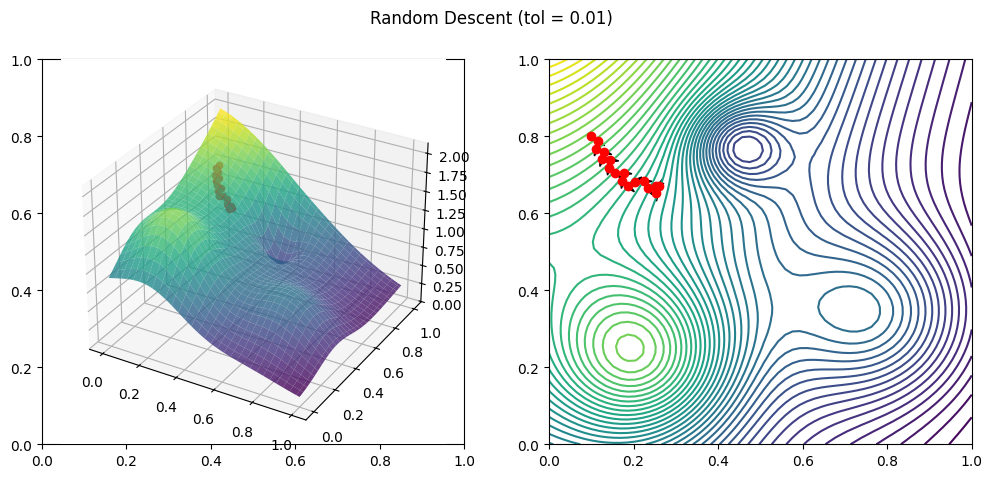



---------------------------------------------
Random descent with tolerance = 1e-03
---------------------------------------------
iter          x          y          f(x,y)
---------------------------------------------
0            0.1        0.8       1.5825390
1        0.10000    0.80000   Uphill-Reject
2        0.10887    0.78207      1.54776254
3        0.11592    0.76336      1.51457275
4        0.11592    0.76336   Uphill-Reject
5        0.13028    0.74944      1.47981773
6        0.13028    0.74944   Uphill-Reject
7        0.13028    0.74944   Uphill-Reject
8        0.13028    0.74944   Uphill-Reject
9        0.13028    0.74944   Uphill-Reject
10       0.13028    0.74944   Uphill-Reject
11       0.11616    0.73527      1.47784754
12       0.11616    0.73527   Uphill-Reject
13       0.11616    0.73527   Uphill-Reject
14       0.11616    0.73527   Uphill-Reject
15       0.11616    0.73527   Uphill-Reject
16       0.13525    0.74124      1.46353619
17       0.13525    0.74124   U

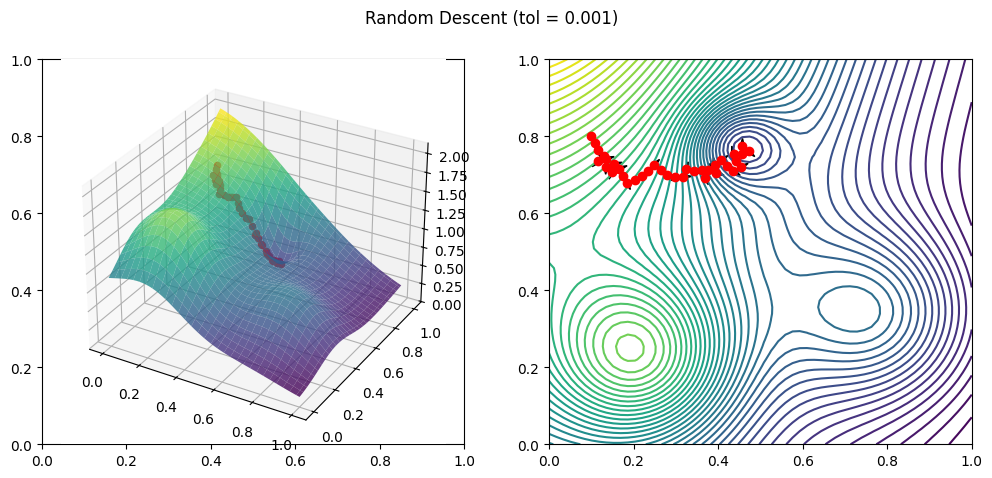

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
max_iter = 100
alpha = 0.02                # fixed step size
tolerances = [1e-2, 1e-3]   # tolerance values

# Define objective function

def f(x, y):
    return (0.75*np.exp(-0.25*((9*x-2)**2+(9*y-2)**2))
          + 0.75*np.exp(-(1/49)*(9*x+1)**2 + 0.1*(9*y+1))
          + 0.5*np.exp(-0.25*((9*x-7)**2+(9*y-3)**2))
          - 0.5*np.exp(-((9*x-4)**2+(9*y-7)**2)))

# Loop through each tolerance
for tol in tolerances:
    print("\n")
    print("-"*45)
    print(f"Random descent with tolerance = {tol:.0e}")
    print("-"*45)

    # Starting point
    xk = np.array([0.1, 0.8])
    fk = f(xk[0], xk[1])
    x_prev, f_prev = xk.copy(), fk   # save the current accepted point and its function value
    k = 0

    # Print header
    print(f"{'iter'} {'x':>10} {'y':>10} {'f(x,y)':>15}")
    print("-"*45)
    print(f"{k:<5} {xk[0]:>10} {xk[1]:>10} {fk:>15.7f}")

    # Plots
    x = np.linspace(0, 1, 60)
    X, Y = np.meshgrid(x, x)
    Z = f(X, Y)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax2 = plt.subplot(1, 2, 2)
    ax2.contour(X, Y, Z, 60)
    ax2.plot(xk[0], xk[1], 'ro')

    # Iteration loop
    for k in range(1, max_iter+1):
        # random direction
        theta = 2*np.pi*np.random.rand()
        pk = np.array([np.cos(theta), np.sin(theta)])
        xk_new = xk + alpha * pk
        f_test = f(xk_new[0], xk_new[1])

        if f_test < fk:  # accept move
            x_prev, f_prev = xk.copy(), fk
            xk, fk = xk_new, f_test

            # plot new point
            ax1.scatter(xk[0], xk[1], fk, color='r', s=20)
            ax2.plot(xk[0], xk[1], 'ro')
            ax2.arrow(x_prev[0], x_prev[1],
                      alpha*pk[0], alpha*pk[1],
                      head_width=0.01, head_length=0.02,
                      fc='k', ec='k')

            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {fk:>15.8f}")

            # Stopping criteria
            if np.linalg.norm(xk - x_prev) < tol or abs(fk - f_prev) < tol:
                print(f"\nStopping: tolerance {tol} reached at iteration {k}")
                break
        else:
            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {'Uphill-Reject':>15}")
    else:
        print("\nReached maximum iterations")

    plt.suptitle(f"Random Descent (tol = {tol})")
    plt.show()


## Stopping criterion 1



---------------------------------------------
Random descent with tolerance = 1e-02
---------------------------------------------
iter          x          y          f(x,y)
---------------------------------------------
0            0.1        0.8       1.5825390
1        0.11502    0.78680      1.54721977
2        0.11502    0.78680   Uphill-Reject
3        0.11897    0.76719      1.51618008
4        0.11078    0.74895      1.50133808
5        0.11078    0.74895   Uphill-Reject
6        0.13075    0.74787      1.47725765
7        0.14993    0.74221      1.44678682
8        0.13979    0.72498      1.43808855
9        0.13979    0.72498   Uphill-Reject
10       0.14314    0.70526      1.41087726
11       0.14503    0.68535      1.38653729
12       0.14503    0.68535   Uphill-Reject
13       0.16109    0.67343      1.35534680
14       0.17877    0.68278      1.34271135
15       0.18900    0.66559      1.31295974
16       0.18900    0.66559   Uphill-Reject
17       0.18900    0.66559   U

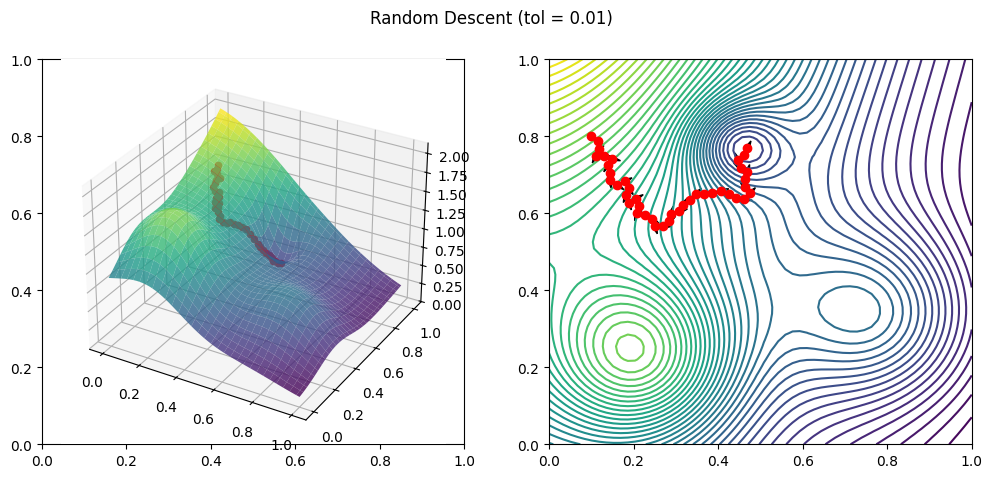



---------------------------------------------
Random descent with tolerance = 1e-03
---------------------------------------------
iter          x          y          f(x,y)
---------------------------------------------
0            0.1        0.8       1.5825390
1        0.10174    0.78008      1.55291367
2        0.12115    0.77528      1.52446438
3        0.11369    0.75672      1.50830756
4        0.11369    0.75672   Uphill-Reject
5        0.13353    0.75931      1.48866889
6        0.13165    0.73939      1.46546551
7        0.11971    0.72335      1.45905507
8        0.11552    0.70379      1.43990606
9        0.13519    0.70741      1.42255499
10       0.13519    0.70741   Uphill-Reject
11       0.13519    0.70741   Uphill-Reject
12       0.13519    0.70741   Uphill-Reject
13       0.15140    0.69568      1.39033603
14       0.16883    0.68588      1.35853456
15       0.16552    0.66615      1.34291115
16       0.18460    0.66015      1.31374906
17       0.19406    0.64253    

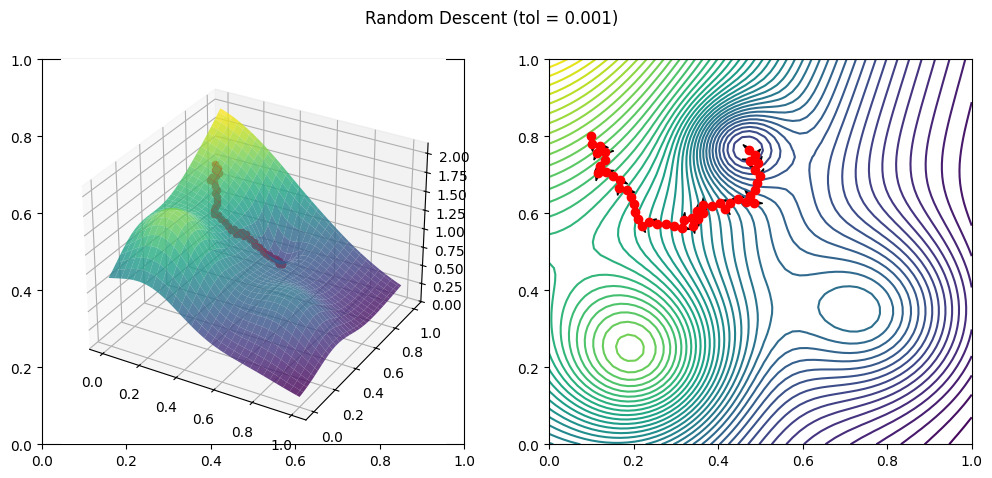

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
max_iter = 100
alpha = 0.02                # fixed step size
tolerances = [1e-2, 1e-3]   # tolerance values

# Define objective function

def f(x, y):
    return (0.75*np.exp(-0.25*((9*x-2)**2+(9*y-2)**2))
          + 0.75*np.exp(-(1/49)*(9*x+1)**2 + 0.1*(9*y+1))
          + 0.5*np.exp(-0.25*((9*x-7)**2+(9*y-3)**2))
          - 0.5*np.exp(-((9*x-4)**2+(9*y-7)**2)))

# Define gradient
def gradient(f, x, h=1e-6):
    df_dx = (f(x[0]+h, x[1]) - f(x[0]-h, x[1])) / (2*h)
    df_dy = (f(x[0], x[1]+h) - f(x[0], x[1]-h)) / (2*h)
    return np.array([df_dx, df_dy])

# Loop through each tolerance
for tol in tolerances:
    print("\n")
    print("-"*45)
    print(f"Random descent with tolerance = {tol:.0e}")
    print("-"*45)

    # Starting point
    xk = np.array([0.1, 0.8])
    fk = f(xk[0], xk[1])
    x_prev, f_prev = xk.copy(), fk   # save the current accepted point and its function value
    k = 0

    # Print header
    print(f"{'iter'} {'x':>10} {'y':>10} {'f(x,y)':>15}")
    print("-"*45)
    print(f"{k:<5} {xk[0]:>10} {xk[1]:>10} {fk:>15.7f}")

    # Plots
    x = np.linspace(0, 1, 60)
    X, Y = np.meshgrid(x, x)
    Z = f(X, Y)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax2 = plt.subplot(1, 2, 2)
    ax2.contour(X, Y, Z, 60)
    ax2.plot(xk[0], xk[1], 'ro')



    # Iteration loop
    for k in range(1, max_iter+1):
        # random direction
        theta = 2*np.pi*np.random.rand()
        pk = np.array([np.cos(theta), np.sin(theta)])
        xk_new = xk + alpha * pk
        f_test = f(xk_new[0], xk_new[1])

        if f_test < fk:  # accept move
            x_prev, f_prev = xk.copy(), fk
            xk, fk = xk_new, f_test
            grad = gradient(f, xk)

            # plot new point
            ax1.scatter(xk[0], xk[1], fk, color='r', s=20)
            ax2.plot(xk[0], xk[1], 'ro')
            ax2.arrow(x_prev[0], x_prev[1],
                      alpha*pk[0], alpha*pk[1],
                      head_width=0.01, head_length=0.02,
                      fc='k', ec='k')

            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {fk:>15.8f}")

            # Stopping criteria
            if np.linalg.norm(grad) < tol:
              print(f"\nStopping: ‖∇f(x_k)‖ < {tol} reached at iteration {k}")
              break

        else:
            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {'Uphill-Reject':>15}")
    else:
        print("\nReached maximum iterations")

    plt.suptitle(f"Random Descent (tol = {tol})")
    plt.show()


# Problem 1 (All in one)



---------------------------------------------
Random descent with tolerance = 1e-02
---------------------------------------------
iter          x          y          f(x,y)
---------------------------------------------
0            0.1        0.8       1.5825390
1        0.11897    0.80634      1.56964278
2        0.11897    0.80634   Uphill-Reject
3        0.10747    0.78998      1.56022443

Stopping: tolerance 0.01 reached at iteration 3
Reason: Small change in function (|fₖ - fₖ₋₁| < ε)


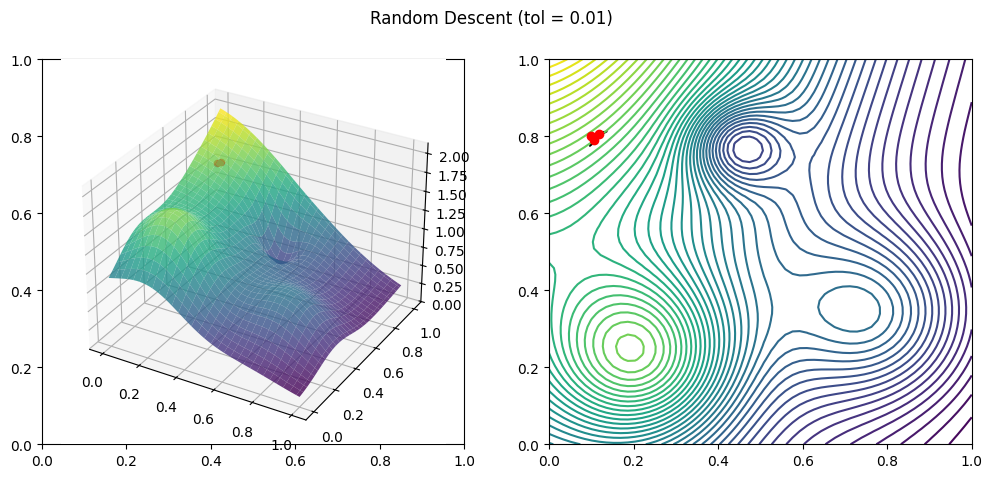



---------------------------------------------
Random descent with tolerance = 1e-03
---------------------------------------------
iter          x          y          f(x,y)
---------------------------------------------
0            0.1        0.8       1.5825390
1        0.11519    0.78699      1.54728955
2        0.11519    0.78699   Uphill-Reject
3        0.11519    0.78699   Uphill-Reject
4        0.10358    0.77070      1.53810851
5        0.12233    0.76373      1.50770928
6        0.12233    0.76373   Uphill-Reject
7        0.12233    0.76373   Uphill-Reject
8        0.12233    0.76373   Uphill-Reject
9        0.14230    0.76476      1.48495711
10       0.13451    0.74634      1.47084748
11       0.13020    0.72681      1.45150960
12       0.13020    0.72681   Uphill-Reject
13       0.12494    0.70751      1.43417529
14       0.12814    0.68777      1.40802176
15       0.14774    0.68382      1.38177291
16       0.14774    0.68382   Uphill-Reject
17       0.14774    0.68382   U

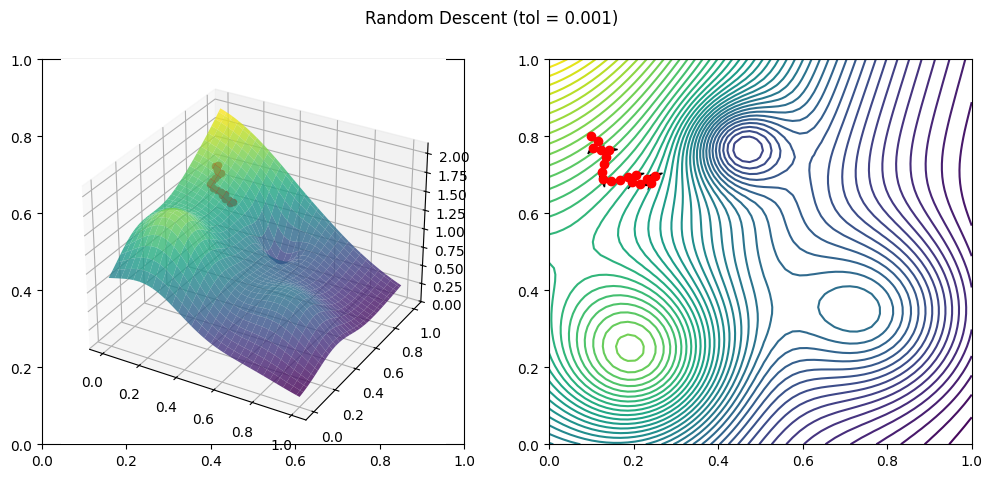

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
max_iter = 100
alpha = 0.02                # fixed step size
tolerances = [1e-2, 1e-3]   # tolerance values

# Define objective function

def f(x, y):
    return (0.75*np.exp(-0.25*((9*x-2)**2+(9*y-2)**2))
          + 0.75*np.exp(-(1/49)*(9*x+1)**2 + 0.1*(9*y+1))
          + 0.5*np.exp(-0.25*((9*x-7)**2+(9*y-3)**2))
          - 0.5*np.exp(-((9*x-4)**2+(9*y-7)**2)))

# Define gradient
def gradient(f, x, h=1e-6):
    df_dx = (f(x[0]+h, x[1]) - f(x[0]-h, x[1])) / (2*h)
    df_dy = (f(x[0], x[1]+h) - f(x[0], x[1]-h)) / (2*h)
    return np.array([df_dx, df_dy])

# Loop through each tolerance
for tol in tolerances:
    print("\n")
    print("-"*45)
    print(f"Random descent with tolerance = {tol:.0e}")
    print("-"*45)

    # Starting point
    xk = np.array([0.1, 0.8])
    fk = f(xk[0], xk[1])
    x_prev, f_prev = xk.copy(), fk   # save the current accepted point and its function value
    k = 0

    # Print header
    print(f"{'iter'} {'x':>10} {'y':>10} {'f(x,y)':>15}")
    print("-"*45)
    print(f"{k:<5} {xk[0]:>10} {xk[1]:>10} {fk:>15.7f}")

    # Plots
    x = np.linspace(0, 1, 60)
    X, Y = np.meshgrid(x, x)
    Z = f(X, Y)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax2 = plt.subplot(1, 2, 2)
    ax2.contour(X, Y, Z, 60)
    ax2.plot(xk[0], xk[1], 'ro')



    # Iteration loop
    for k in range(1, max_iter+1):
        # random direction
        theta = 2*np.pi*np.random.rand()
        pk = np.array([np.cos(theta), np.sin(theta)])
        xk_new = xk + alpha * pk
        f_test = f(xk_new[0], xk_new[1])

        if f_test < fk:  # accept move
            x_prev, f_prev = xk.copy(), fk
            xk, fk = xk_new, f_test
            grad = gradient(f, xk)

            # plot new point
            ax1.scatter(xk[0], xk[1], fk, color='r', s=20)
            ax2.plot(xk[0], xk[1], 'ro')
            ax2.arrow(x_prev[0], x_prev[1],
                      alpha*pk[0], alpha*pk[1],
                      head_width=0.01, head_length=0.02,
                      fc='k', ec='k')

            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {fk:>15.8f}")

            # Stopping criteria
            if (np.linalg.norm(grad) < tol or             # Criterion 1
                np.linalg.norm(xk - x_prev) < tol or      # Criterion 2
                abs(fk - f_prev) < tol):
                print(f"\nStopping: tolerance {tol} reached at iteration {k}")
                if np.linalg.norm(grad) < tol:
                  print("Reason: Gradient norm small (‖∇f(xₖ)‖ < ε)")
                elif np.linalg.norm(xk - x_prev) < tol:
                  print("Reason: Small step size (‖xₖ - xₖ₋₁‖ < ε)")
                else:
                  print("Reason: Small change in function (|fₖ - fₖ₋₁| < ε)")
                break

        else:
          print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {'Uphill-Reject':>15}")
    else:
      print("\nReached maximum iterations")

    plt.suptitle(f"Random Descent (tol = {tol})")
    plt.show()


# Problem 2

## 3-variable function


---------------------------------------------
Random descent with tolerance = 1e-02
---------------------------------------------
iter           x          y          z        f(x,y,z)
---------------------------------------------
0       -0.50000    0.70000    0.00000      0.74000000
1       -0.50383    0.67567    0.02487      0.71098981
2       -0.51773    0.64639    0.03808      0.68731510
3       -0.51773    0.64639    0.03808   Uphill-Reject
4       -0.51773    0.64639    0.03808   Uphill-Reject
5       -0.48808    0.65367    0.05519      0.66854871
6       -0.49838    0.62084    0.06163      0.63762127
7       -0.49838    0.62084    0.06163   Uphill-Reject
8       -0.49838    0.62084    0.06163   Uphill-Reject
9       -0.47533    0.61029    0.08578      0.60575994
10      -0.46527    0.57903    0.09786      0.56132876
11      -0.46527    0.57903    0.09786   Uphill-Reject
12      -0.46527    0.57903    0.09786   Uphill-Reject
13      -0.43808    0.55765    0.09251      0.5114483

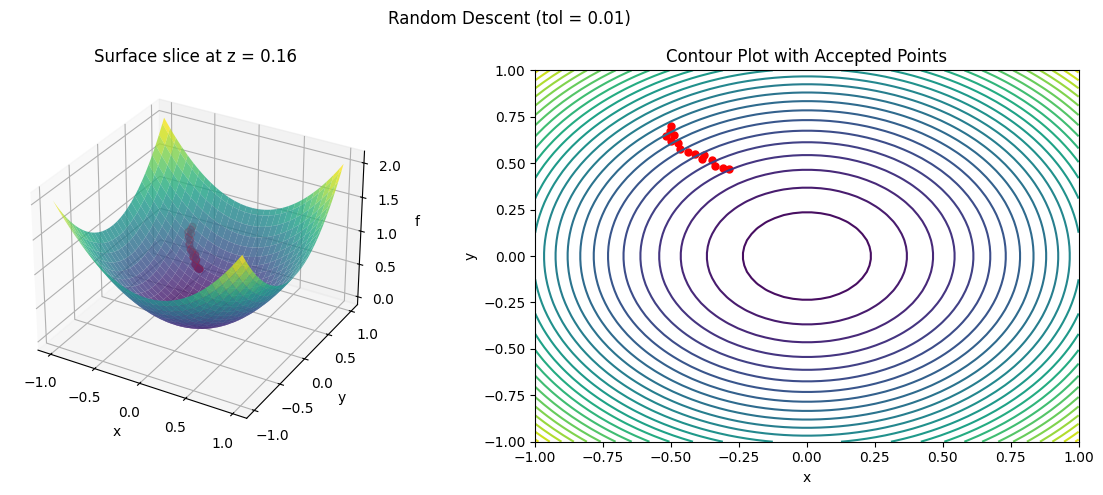


---------------------------------------------
Random descent with tolerance = 1e-03
---------------------------------------------
iter           x          y          z        f(x,y,z)
---------------------------------------------
0       -0.50000    0.70000    0.00000      0.74000000
1       -0.50000    0.70000    0.00000   Uphill-Reject
2       -0.49167    0.67049    0.01687      0.69157189
3       -0.49167    0.67049    0.01687   Uphill-Reject
4       -0.49167    0.67049    0.01687   Uphill-Reject
5       -0.46085    0.68225    0.02857      0.67867264
6       -0.46085    0.68225    0.02857   Uphill-Reject
7       -0.42618    0.67755    0.02801      0.64148560
8       -0.42618    0.67755    0.02801   Uphill-Reject
9       -0.42618    0.67755    0.02801   Uphill-Reject
10      -0.42618    0.67755    0.02801   Uphill-Reject
11      -0.42618    0.67755    0.02801   Uphill-Reject
12      -0.42618    0.67755    0.02801   Uphill-Reject
13      -0.42618    0.67755    0.02801   Uphill-Rejec

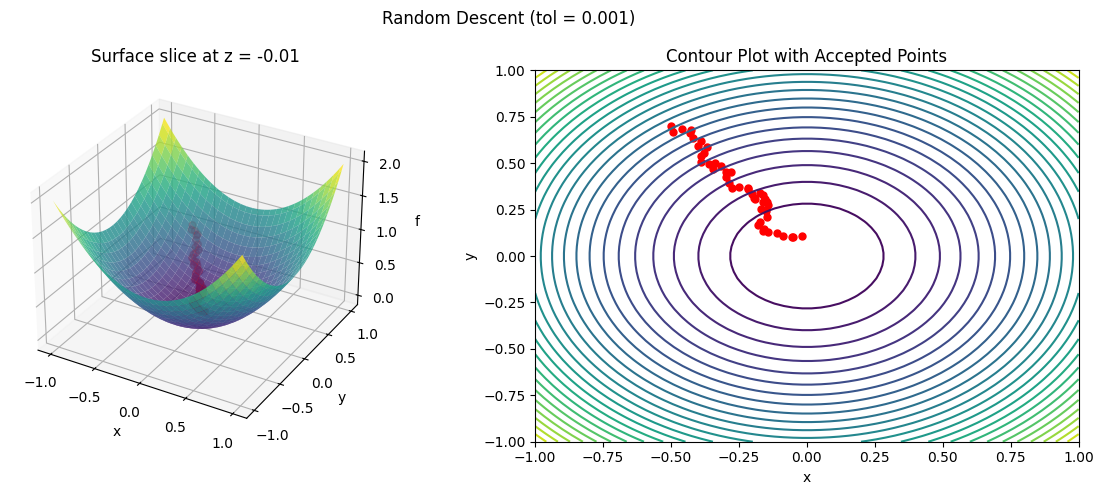

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
max_iter = 100
alpha = 0.035
tolerances = [1e-2, 1e-3]

# Objective function
def f(x, y, z):
    return x**2 + y**2 + z**2


# Loop through each tolerance
for tol in tolerances:
    print("\n" + "-"*45)
    print(f"Random descent with tolerance = {tol:.0e}")
    print("-"*45)

    # Initial setup
    xk = np.array([-0.5, 0.7, 0])
    fk = f(*xk)
    x_prev, f_prev = xk.copy(), fk
    k = 0
    trajectory = [xk.copy()]


    print(f"{'iter':<5} {'x':>10} {'y':>10} {'z':>10} {'f(x,y,z)':>15}")
    print("-"*45)
    print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {xk[2]:>10.5f} {fk:>15.8f}")

    # Iteration loop
    for k in range(1, max_iter+1):
        pk = np.random.randn(3)
        pk /= np.linalg.norm(pk)

        xk_new = xk + alpha * pk
        f_test = f(*xk_new)

        if f_test < fk:
            x_prev, f_prev = xk.copy(), fk
            xk, fk = xk_new, f_test
            trajectory.append(xk.copy())

            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {xk[2]:>10.5f} {fk:>15.8f}")

            if np.linalg.norm(xk - x_prev) < tol or abs(fk - f_prev) < tol:
                print(f"\nStopping: tolerance {tol} reached at iteration {k}")
                break
        else:
            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {xk[2]:>10.5f} {'Uphill-Reject':>15}")

    else:
        print("\nReached maximum iterations.")

    print(f"\nFinal point: x = {xk[0]:.5f}, y = {xk[1]:.5f}, z = {xk[2]:.5f}")
    print(f"Final f(x,y,z) = {fk:.8f}")

    # Convert trajectory to array
    trajectory = np.array(trajectory)

    # Prepare visualization grid
    x = np.linspace(-1, 1, 60)
    y = np.linspace(-1, 1, 60)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y, xk[2])  # fixed z slice for visualization

    # Plot
    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(f"Random Descent (tol = {tol})")

    # 3D surface with red points
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax1.scatter(trajectory[:, 0], trajectory[:, 1],
                f(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2]),
                color='r', s=25)
    ax1.set_title(f"Surface slice at z = {xk[2]:.2f}")
    ax1.set_xlabel('x'); ax1.set_ylabel('y'); ax1.set_zlabel('f')

    # Contour with only red dots
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.contour(X, Y, Z, 30)
    ax2.scatter(trajectory[:, 0], trajectory[:, 1],
                color='r', s=25)
    ax2.set_xlabel('x'); ax2.set_ylabel('y')
    ax2.set_xlim(-1, 1); ax2.set_ylim(-1, 1)
    ax2.set_title('Contour Plot with Accepted Points')

    plt.tight_layout()
    plt.show()


## 4-variable function

In [ ]:
import numpy as np

# Parameters
max_iter = 100
alpha = 0.02                # fixed step size
tolerances = [1e-2, 1e-3]   # tolerance values

# Define objective function f(x, y, z, t)
# I chose Minkowski metric squared interval :D

def f4(x, y, z, t, c=1.0):
    return ((x**2 + y**2 + z**2) - (c*t)**2)**2

# Loop through each tolerance
for tol in tolerances:
    print("\n" + "-"*65)
    print(f" Random Descent with tolerance = {tol:.0e} for f(x,y,z,t) = log(x² + y² + z² + t²) ")
    print("-"*65)

    # Starting point (4 variables)
    xk = np.array([0.4, -0.3, 0.5, 0.2])   # (x, y, z, t)
    fk = f4(xk[0], xk[1], xk[2], xk[3])
    x_prev, f_prev = xk.copy(), fk
    k = 0

    # Print header
    print(f"{'iter':<5} {'x':>10} {'y':>10} {'z':>10} {'t':>10} {'f(x,y,z,t)':>15}")
    print("-"*65)
    print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {xk[2]:>10.5f} {xk[3]:>10.5f} {fk:>15.8f}")

    # Iteration loop
    for k in range(1, max_iter + 1):
        # random 4D direction (normalized)
        pk = np.random.randn(4)
        pk = pk / np.linalg.norm(pk)

        # step
        xk_new = xk + alpha * pk
        f_test = f4(xk_new[0], xk_new[1], xk_new[2], xk_new[3])

        # accept move if downhill
        if f_test < fk:
            x_prev, f_prev = xk.copy(), fk
            xk, fk = xk_new, f_test

            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {xk[2]:>10.5f} {xk[3]:>10.5f} {fk:>15.8f}")

            # ---- stopping criteria ----
            if np.linalg.norm(xk - x_prev) < tol or abs(fk - f_prev) < tol:
                print(f"\nStopping: tolerance {tol} reached at iteration {k}")
                break
        else:
            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {xk[2]:>10.5f} {xk[3]:>10.5f} {'Uphill-Reject':>15}")

    else:
        print("\nReached maximum iterations without satisfying tolerance.")

    print(f"\nFinal point: x = {xk[0]:.5f}, y = {xk[1]:.5f}, z = {xk[2]:.5f}, t = {xk[3]:.5f}")
    print(f"Final f(x,y,z,t) = {fk:.8f}")



-----------------------------------------------------------------
 Random Descent with tolerance = 1e-02 for f(x,y,z,t) = log(x² + y² + z² + t²) 
-----------------------------------------------------------------
iter           x          y          z          t      f(x,y,z,t)
-----------------------------------------------------------------
0        0.40000   -0.30000    0.50000    0.20000      0.21160000
1        0.38255   -0.29867    0.49708    0.19077      0.19913057
2        0.38255   -0.29867    0.49708    0.19077   Uphill-Reject
3        0.38255   -0.29867    0.49708    0.19077   Uphill-Reject
4        0.38189   -0.28026    0.49003    0.18744      0.18436575
5        0.38189   -0.28026    0.49003    0.18744   Uphill-Reject
6        0.38189   -0.28026    0.49003    0.18744   Uphill-Reject
7        0.38189   -0.28026    0.49003    0.18744   Uphill-Reject
8        0.38189   -0.28026    0.49003    0.18744   Uphill-Reject
9        0.39003   -0.28105    0.47198    0.19018      0.1744

## 5 variables

In [ ]:
import numpy as np

# Parameters
max_iter = 100
alpha = 0.02               # fixed step size
tolerances = [1e-2, 1e-3]  # tolerance values

# Define objective function
# Kerr-like gravitational potential of Black Hole :D
def f5(x, y, z, t, a, M=1.0):
    r = np.sqrt(x**2 + y**2 + z**2)
    return -M / (r - a * np.sin(t)**2)

# Loop through each tolerance
for tol in tolerances:
    print("\n" + "-"*70)
    print(f" Random Descent with tolerance = {tol:.0e}")
    print("-"*70)

    # Starting point (x, y, z, t, a)
    xk = np.array([0.5, 0.3, 0.2, 0.6, 0.2])
    fk = f5(*xk)
    x_prev, f_prev = xk.copy(), fk
    k = 0

    # Print header
    print(f"{'iter':<5} {'x':>10} {'y':>10} {'z':>10} {'t':>10} {'a':>10} {'f(x,y,z,t,a)':>15}")
    print("-"*70)
    print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {xk[2]:>10.5f} {xk[3]:>10.5f} {xk[4]:>10.5f} {fk:>15.8f}")

    # Iteration loop
    for k in range(1, max_iter + 1):
        # random 5D direction (normalized)
        pk = np.random.randn(5)
        pk /= np.linalg.norm(pk)

        # step
        xk_new = xk + alpha * pk
        f_test = f5(*xk_new)

        # accept move if downhill
        if f_test < fk:
            x_prev, f_prev = xk.copy(), fk
            xk, fk = xk_new, f_test

            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {xk[2]:>10.5f} {xk[3]:>10.5f} {xk[4]:>10.5f} {fk:>15.8f}")

            # ---- stopping criteria ----
            if np.linalg.norm(xk - x_prev) < tol or abs(fk - f_prev) < tol:
                print(f"\nStopping: tolerance {tol} reached at iteration {k}")
                break
        else:
            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {xk[2]:>10.5f} {xk[3]:>10.5f} {xk[4]:>10.5f} {'Uphill-Reject':>15}")

    else:
        print("\nReached maximum iterations.")

    print(f"\nFinal point: x={xk[0]:.5f}, y={xk[1]:.5f}, z={xk[2]:.5f}, t={xk[3]:.5f}, a={xk[4]:.5f}")
    print(f"Final f(x,y,z,t,a) = {fk:.8f}")



----------------------------------------------------------------------
 Random Descent with tolerance = 1e-02
----------------------------------------------------------------------
iter           x          y          z          t          a    f(x,y,z,t,a)
----------------------------------------------------------------------
0        0.50000    0.30000    0.20000    0.60000    0.20000     -1.80937452
1        0.50000    0.30000    0.20000    0.60000    0.20000   Uphill-Reject
2        0.50036    0.28141    0.20298    0.60397    0.20545     -1.84286021
3        0.49371    0.27481    0.20323    0.61412    0.21990     -1.89588504
4        0.49440    0.26742    0.20961    0.61412    0.23735     -1.91906863
5        0.49440    0.26742    0.20961    0.61412    0.23735   Uphill-Reject
6        0.49323    0.25248    0.22225    0.61066    0.23928     -1.92926440
7        0.49323    0.25248    0.22225    0.61066    0.23928   Uphill-Reject
8        0.49323    0.25248    0.22225    0.61066    0

# Problem 3


------------------------------------------------------------
Random Descent (tol = 1e-02)
------------------------------------------------------------
iter           x          y          f(x,y)      alpha_k
------------------------------------------------------------
0        0.10000    0.80000      1.58253898            -
1        0.10000    0.80000   Uphill-Reject
2        0.10000    0.80000   Uphill-Reject
3        0.09980    0.70000      1.45140111      0.10000
4        0.19595    0.67253      1.31004106      0.10000
5        0.27655    0.73173      1.20999932      0.10000
6        0.37220    0.70255      0.85862511      0.10000
7        0.44701    0.76891      0.49470723      0.10000
8        0.44701    0.76891   Uphill-Reject
9        0.47667    0.78285      0.49018832      0.03277
10       0.47667    0.78285   Uphill-Reject
11       0.47667    0.78285   Uphill-Reject
12       0.47667    0.78285   Uphill-Reject
13       0.47667    0.78285   Uphill-Reject
14       0.47667    0.7

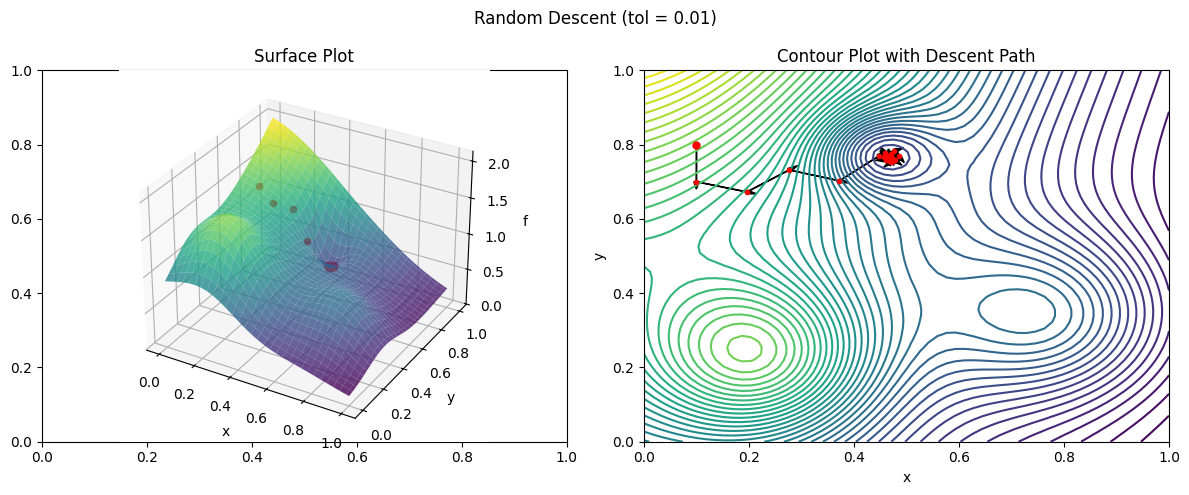


------------------------------------------------------------
Random Descent (tol = 1e-03)
------------------------------------------------------------
iter           x          y          f(x,y)      alpha_k
------------------------------------------------------------
0        0.10000    0.80000      1.58253898            -
1        0.10000    0.80000   Uphill-Reject
2        0.18590    0.74881      1.40612391      0.10000
3        0.18590    0.74881   Uphill-Reject
4        0.25561    0.82051      1.36537596      0.10000
5        0.35525    0.81208      0.96356906      0.10000
6        0.35525    0.81208   Uphill-Reject
7        0.35525    0.81208   Uphill-Reject
8        0.35525    0.81208   Uphill-Reject
9        0.41081    0.72893      0.64558747      0.10000
10       0.51078    0.73138      0.55613461      0.10000
11       0.46056    0.72141      0.55049564      0.05120
12       0.46450    0.80131      0.52421461      0.08000
13       0.45007    0.73896      0.51950607      0.064

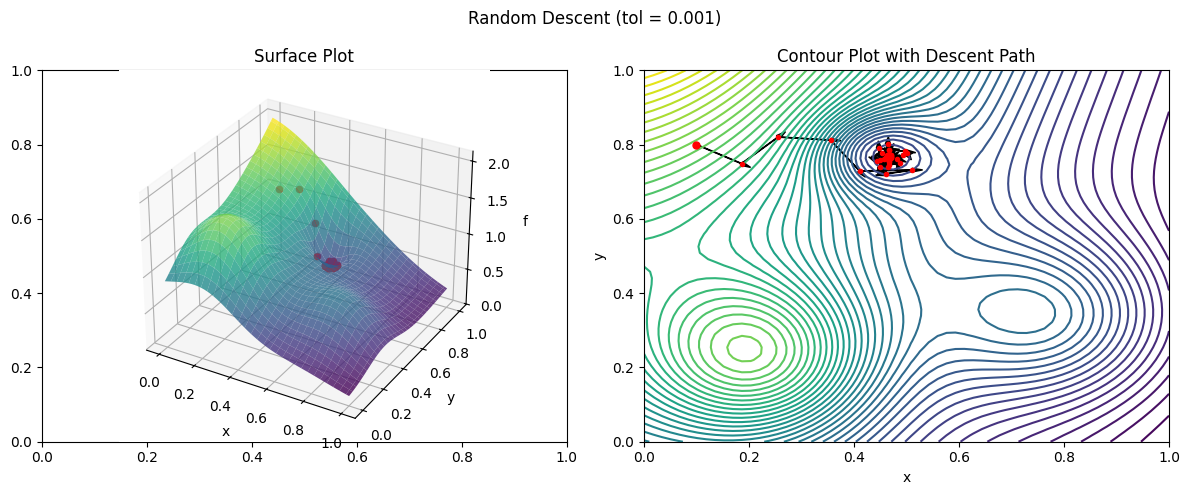

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
max_iter = 100
alpha_init = 0.1           # initial trial step size
shrink_factor = 0.8        # factor to reduce alpha if f doesn't decrease
tolerances = [1e-2, 1e-3]  # optional tolerances for multiple runs

# Objective function (same as instructor’s)
def f(x, y):
    return (0.75*np.exp(-0.25*((9*x-2)**2+(9*y-2)**2))
          + 0.75*np.exp(-(1/49)*(9*x+1)**2 + 0.1*(9*y+1))
          + 0.5*np.exp(-0.25*((9*x-7)**2+(9*y-3)**2))
          - 0.5*np.exp(-((9*x-4)**2+(9*y-7)**2)))

# Loop for each tolerance
for tol in tolerances:
    print("\n" + "-"*60)
    print(f"Random Descent (tol = {tol:.0e})")
    print("-"*60)

    # Starting point
    xk = np.array([0.1, 0.8])
    fk = f(xk[0], xk[1])
    k = 0

    # Print header
    print(f"{'iter':<5} {'x':>10} {'y':>10} {'f(x,y)':>15} {'alpha_k':>12}")
    print("-"*60)
    print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {fk:>15.8f} {'-':>12}")

    # Plot setup
    x = np.linspace(0, 1, 60)
    X, Y = np.meshgrid(x, x)
    Z = f(X, Y)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # 3D surface
    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax1.set_title("Surface Plot")
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f')

    # Contour plot
    ax2 = plt.subplot(1, 2, 2)
    ax2.contour(X, Y, Z, 60)
    ax2.plot(xk[0], xk[1], 'ro', label="Start", markersize=5)
    ax2.set_title("Contour Plot with Descent Path")
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    # Iteration loop
    for k in range(1, max_iter + 1):

        # Random direction vector
        theta = 2 * np.pi * np.random.rand()
        pk = np.array([np.cos(theta), np.sin(theta)])

        # Initialize alpha
        alpha = alpha_init
        f_test = f(xk[0] + alpha * pk[0], xk[1] + alpha * pk[1])

        # Backtracking alpha
        while f_test >= fk and alpha > 1e-6:
            alpha *= shrink_factor
            f_test = f(xk[0] + alpha * pk[0], xk[1] + alpha * pk[1])

        # If no improvement, reject
        if f_test >= fk:
            print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {'Uphill-Reject':>15}")
            continue

        # Accept step
        x_prev = xk.copy()
        xk = xk + alpha * pk
        fk = f(xk[0], xk[1])


        print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {fk:>15.8f} {alpha:>12.5f}")

        # Plot accepted step
        # 3D red point
        ax1.scatter(xk[0], xk[1], fk, color='r', s=20)

        # 2D contour red point
        ax2.plot(xk[0], xk[1], 'ro', markersize=3)

        # Arrow from previous to current point
        ax2.arrow(x_prev[0], x_prev[1],
                  xk[0] - x_prev[0],
                  xk[1] - x_prev[1],
                  head_width=0.01, head_length=0.02,
                  fc='k', ec='k', linewidth=1)

    plt.suptitle(f"Random Descent (tol = {tol})")
    plt.tight_layout()
    plt.show()


# Problem 4

iter           x          y          f(x,y)      alpha_k
------------------------------------------------------------
0        0.10000    0.60000      1.35214748            -
1        0.08820    0.58385      1.34964172      0.02000
2        0.08461    0.56417      1.34061279      0.02000
3        0.10449    0.56638      1.32938167      0.02000
4        0.12362    0.56053      1.31392196      0.02000
5        0.12362    0.56053   Uphill-Reject
6        0.13393    0.54339      1.30334557      0.02000
7        0.15340    0.53884      1.28871641      0.02000
8        0.16020    0.52003      1.28719571      0.02000
9        0.17715    0.50942      1.27837541      0.02000
10       0.17715    0.50942   Uphill-Reject
11       0.17715    0.50942   Uphill-Reject
12       0.17715    0.50942   Uphill-Reject
13       0.17715    0.50942   Uphill-Reject
14       0.17715    0.50942   Uphill-Reject
15       0.17715    0.50942   Uphill-Reject
16       0.19116    0.49515      1.27584391      0.02000
17  

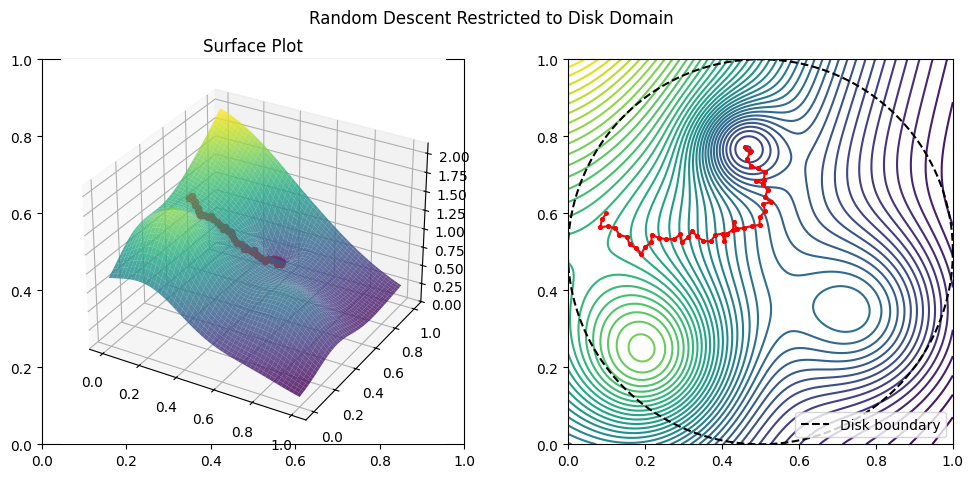

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
max_iter = 200
alpha = 0.02  # fixed step length

# Objective function
def f(x, y):
    return (0.75*np.exp(-0.25*((9*x-2)**2+(9*y-2)**2))
          + 0.75*np.exp(-(1/49)*(9*x+1)**2 + 0.1*(9*y+1))
          + 0.5*np.exp(-0.25*((9*x-7)**2+(9*y-3)**2))
          - 0.5*np.exp(-((9*x-4)**2+(9*y-7)**2)))

# Disk parameters
center = np.array([0.5, 0.5])
radius = np.sqrt(0.25)

def inside_disk(point):
    """Check if point lies inside or on the disk."""
    return np.linalg.norm(point - center) <= radius

# Start
xk = np.array([0.1, 0.6])  # initial point
fk = f(xk[0], xk[1])
print(f"{'iter':<5} {'x':>10} {'y':>10} {'f(x,y)':>15} {'alpha_k':>12}")
print("-"*60)
print(f"{0:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {fk:>15.8f} {'-':>12}")

# Set up plot
x = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, x)
Z = f(X, Y)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot")
ax2 = plt.subplot(1, 2, 2)
ax2.contour(X, Y, Z, 60)

# draw disk
theta = np.linspace(0, 2*np.pi, 200)
ax2.plot(center[0] + radius*np.cos(theta),
         center[1] + radius*np.sin(theta), 'k--', label='Disk boundary')
ax2.set_aspect('equal')

# iteration loop
for k in range(1, max_iter+1):

    # random unit direction
    phi = 2*np.pi*np.random.rand()
    pk = np.array([np.cos(phi), np.sin(phi)])
    xk_new = xk + alpha * pk

    # ensure inside disk
    if not inside_disk(xk_new):
        print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {'Out of disk':>15}")
        continue

    # test function value
    f_test = f(xk_new[0], xk_new[1])

    # accept move if downhill
    if f_test < fk:
        ax1.scatter(xk_new[0], xk_new[1], f_test, color='r', s=20)
        ax2.plot([xk[0], xk_new[0]], [xk[1], xk_new[1]], 'r.-', markersize=5)

        xk, fk = xk_new, f_test
        print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {fk:>15.8f} {alpha:>12.5f}")
    else:
        print(f"{k:<5} {xk[0]:>10.5f} {xk[1]:>10.5f} {'Uphill-Reject':>15}")

plt.suptitle("Random Descent Restricted to Disk Domain")
plt.legend(loc='lower right')
plt.show()
